In [72]:
# !pip install -q tensorflow-text==2.5.0 
# !pip install tensorflow==2.5.0


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

In [17]:
import pkg_resources
for entry_point in pkg_resources.iter_entry_points("tensorboard_plugins"):
  print(entry_point.dist)

tensorboard 2.5.0
tensorboard-plugin-wit 1.8.0


In [18]:
!ls -alrt /usr/local/lib/python3.6/dist-packages/*


ls: cannot access '/usr/local/lib/python3.6/dist-packages/*': No such file or directory


In [19]:
print(tf.__version__)

2.5.0


In [20]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
dataset,info = tfds.load("amazon_us_reviews/Mobile_Electronics_v1_00",with_info=True)
train_dataset = dataset["train"]

In [22]:
info

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [23]:
print(train_dataset)

<PrefetchDataset shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [24]:
len(list(train_dataset))

104975

In [25]:
BUFFER_SIZE = 30000
BATCH_SIZE = 12

In [26]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE,reshuffle_each_iteration=False)

In [27]:
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'50371676'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B001K0OIAW'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'25126301'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Westclox Travelmate Folding Travel Alarm Clock, Black 47508'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'great small alarm clock, good set-up as far as control buttons, nice size.  Have had one for many years, wanted to get another since I like it so well (the first one still works fine), but could no longer find one locally at the store.  Glad to find it still available thru Amazon.'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2012-02-17'>, 'review_headline': 

In [28]:
for reviews in train_dataset.take(10):
  review_text = reviews["data"]
  print(review_text.get("review_body").numpy())
  print(review_text.get("star_rating"))
  print(tf.where(review_text.get("star_rating")>3,1,0).numpy())

b'great small alarm clock, good set-up as far as control buttons, nice size.  Have had one for many years, wanted to get another since I like it so well (the first one still works fine), but could no longer find one locally at the store.  Glad to find it still available thru Amazon.'
tf.Tensor(5, shape=(), dtype=int32)
1
b'this is a great investment to keep the Nano in good shape. Nice quality plastic and fits perfectly.'
tf.Tensor(4, shape=(), dtype=int32)
1
b'This sub set up is awesome. If can kick hard and add an all encompassing experience. It took me a few hours to install because the instructions kind of suck. They could be a little more specific about some things. I highly recommend installing the power control to help maintain a good sound with differet genres. I have tried this sub with many...Pearl Jam, Metallica, Minaj, Guetta, Skrillex (nice bass test), some country stuff, and it sounds great every time. For this price, why are you still reading this? Buy it now.'
tf.Tensor

In [29]:
tokenizer =  tfds.deprecated.text.Tokenizer()
vocabulary_set = set()

for _,reviews in train_dataset.enumerate():
  review_text = reviews["data"]
  reviews_tokens = tokenizer.tokenize(review_text.get("review_body").numpy())
  vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size

73738

In [30]:
encoder = tfds.deprecated.text.TokenTextEncoder(vocabulary_set)

In [31]:
encoder.save_to_file("/content/drive/MyDrive/Machine_learning/Model/sa_encoder.vocab")


In [ ]:
print(vocabulary_set)

{'guitars', 'SP2', 'doughnut', 'kiddish', 'neatness', 'compant', 'SmartWrap', 'firmly', 'IMP52', 'JINX', 'iAudio4', 'K5PRM', 'Construction', 'Successfully', 'wid', 'scouring', 'nom', 'serendipity', 'wieving', 'wendsday', 'GRANDDAUGHTERS', 'Lowrance', 'FRIKIN', 'AM', 'dictated', '125bt', 'skip', 'tinmes', '1254', 'todos', 'Cabela', 'pena', 'shortfall', 'WIN', 'Deciding', 'usesful', 'Doc', 'ValleyBuy', 'Syn', 'distributers', '9cf0b1e718438588f76d86442973b455', '4x80', 'brilliantly', 'Regal', 'PLANET', 'Gatsby', '3210', '02', '800', 'OTA', 'esould', 'DOEST', 'gogles', 'EVERYDAY', 'powerpoint', '5Gb', 'k1500', 'easiy', 'eslewhere', 'rebuild', 'plyier', 'SHe', 'exploded', 'resistor', 'RUX', 'abilty', 'KORG', 'Controls', 'Brainydeal', 'Unspecified', 'whic', 'pt', '400RMS', 'Hartford', 'backing', 'Petro', 'queue', 'Linking', 'sonota', 'infected', 'ESPERADO', 'CHIRP', 'pe_175190_21431760_cs_sce_dp_i2', 'milimeter', 'skelter', 'Dist', 'relplaced', '4ohm', 'shelf', 'unworkable', '2X', 'horrificl

In [ ]:
for reviews in train_dataset.take(5):
  review_text = reviews["data"]
  print(review_text.get("review_body").numpy())
  encoded_example = encoder.encode(review_text.get("review_body").numpy())
  print(encoded_example)

b'My Incase armband was falling apart (after 4 years of extensive use.  This one is better because: It fits tightly on my arm ( the Incase strap was too long).  This has convenient openeing for earphone and access to change the \\\\"lock\\\\" on the top. The fit is just perfect for my 4GB ipod and thus holds ipod securely. The plastic cover is thick, and should last.'
[33744, 617, 60356, 16850, 49482, 17732, 23352, 15168, 62706, 48126, 71444, 6047, 43132, 44379, 27686, 62503, 19467, 4965, 52672, 50930, 13626, 27104, 24280, 50307, 617, 46095, 16850, 72297, 17713, 43132, 54177, 42143, 50810, 3619, 44516, 62128, 73335, 56827, 38449, 50307, 56055, 13626, 50307, 61119, 27521, 13554, 27686, 44225, 42454, 3619, 27104, 62231, 11869, 62128, 44605, 71741, 11869, 8642, 27521, 43514, 64966, 27686, 69458, 62128, 40401, 49741]
b'My seven year old son goes through cables because they are too short.  This cable is almost ten feet long, so there is plenty of length to prevent him from yanking on it con

In [ ]:
for index in encoded_example:
  print("{} -------> {}".format(index, encoder.decode([index])))

43132 -------> This
34049 -------> product
52672 -------> fits
27104 -------> my
11869 -------> ipod
72660 -------> pretty
63665 -------> well
65414 -------> but
61653 -------> there
27686 -------> is
36949 -------> a
62699 -------> gap
4965 -------> It
27686 -------> is
36949 -------> a
59800 -------> bit
28221 -------> big
62128 -------> and
27686 -------> is
36949 -------> a
11527 -------> hassle
45261 -------> I
5949 -------> always
47159 -------> have
56827 -------> to
31402 -------> move
27104 -------> my
8756 -------> case
34637 -------> up
3619 -------> for
50307 -------> the
64347 -------> power
64367 -------> button
62128 -------> and
60740 -------> then
50307 -------> the
13183 -------> camera
55352 -------> doesn
62004 -------> t
65211 -------> line
34637 -------> up


In [ ]:
def encode(text_tensor, label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label = tf.where(label_tensor > 3, 1, 0)
  return encoded_text, label

In [ ]:
def encode_map_fn(tensor):
  text = tensor["data"].get("review_body")
  label = tensor["data"].get("star_rating")
  
  encoded_text , label = tf.py_function(
                  encode, 
                  inp=[text, label],
                  Tout=(tf.int64, tf.int32)
                )

  # encoded_text , label = encode(text,label)
  encoded_text.set_shape([None])
  label.set_shape([])
  return encoded_text, label

In [ ]:
ar_encoded_data = train_dataset.map(encode_map_fn)

In [ ]:
for f0, f1 in ar_encoded_data.take(2):
  print(f0)
  print(f1)

tf.Tensor(
[33744   617 60356 16850 49482 17732 23352 15168 62706 48126 71444  6047
 43132 44379 27686 62503 19467  4965 52672 50930 13626 27104 24280 50307
   617 46095 16850 72297 17713 43132 54177 42143 50810  3619 44516 62128
 73335 56827 38449 50307 56055 13626 50307 61119 27521 13554 27686 44225
 42454  3619 27104 62231 11869 62128 44605 71741 11869  8642 27521 43514
 64966 27686 69458 62128 40401 49741], shape=(66,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[33744 23784 18540 27997 51205 13425 32614  6588 19467 23990 19904 72297
 67351 43132 49239 27686 31987 41541 49736 17713 34561 61653 27686 62743
 48126 30589 56827 64131 68026 32432 64263 13626 50526 15334 27521 49239
  7446 43689 21553 62128  6268 23973 50307 70520 27920 49239 45261 61096
 18780 36119 62128 45261 26763 51518 53780 37368  3619 27104 46825 26194
 14603], shape=(61,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)


In [ ]:
TAKE_SIZE = 10000

In [ ]:
train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = ar_encoded_data.padded_batch(BATCH_SIZE)

In [ ]:
vocab_size += 1

In [ ]:
sample_text,sample_labels = next(iter(test_data))
sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(342,), dtype=int64, numpy=
 array([33744,   617, 60356, 16850, 49482, 17732, 23352, 15168, 62706,
        48126, 71444,  6047, 43132, 44379, 27686, 62503, 19467,  4965,
        52672, 50930, 13626, 27104, 24280, 50307,   617, 46095, 16850,
        72297, 17713, 43132, 54177, 42143, 50810,  3619, 44516, 62128,
        73335, 56827, 38449, 50307, 56055, 13626, 50307, 61119, 27521,
        13554, 27686, 44225, 42454,  3619, 27104, 62231, 11869, 62128,
        44605, 71741, 11869,  8642, 27521, 43514, 64966, 27686, 69458,
        62128, 40401, 49741,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size,128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

for units in [64,64]:
  model.add(tf.keras.layers.Dense(units,activation="relu"))
  # model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [ ]:
!rm -r /tmp/logs/

In [ ]:
logdir = os.path.join("/tmp/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)


checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="/tmp/sentiment.hdf5"
                  ,verbose=1,save_best_only=False)

model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"]
              )

In [ ]:
history = model.fit(train_data, epochs=5,validation_data=test_data,
                    callbacks=[tensorboard_callback,checkpointer]
                      )

Epoch 1/5
7915/7915 [==============================] - 2852s 354ms/step - loss: 0.3203 - accuracy: 0.8547 - val_loss: 0.2113 - val_accuracy: 0.9050

Epoch 00001: saving model to /tmp/sentiment.hdf5
Epoch 2/5
7915/7915 [==============================] - 2821s 351ms/step - loss: 0.2080 - accuracy: 0.9151 - val_loss: 0.1992 - val_accuracy: 0.9293

Epoch 00002: saving model to /tmp/sentiment.hdf5
Epoch 3/5
7915/7915 [==============================] - 2867s 357ms/step - loss: 0.1588 - accuracy: 0.9384 - val_loss: 0.1360 - val_accuracy: 0.9546

Epoch 00003: saving model to /tmp/sentiment.hdf5
Epoch 4/5
7915/7915 [==============================] - 2830s 352ms/step - loss: 0.1187 - accuracy: 0.9564 - val_loss: 0.1008 - val_accuracy: 0.9673

Epoch 00004: saving model to /tmp/sentiment.hdf5
Epoch 5/5
7915/7915 [==============================] - 2805s 349ms/step - loss: 0.0878 - accuracy: 0.9677 - val_loss: 0.0872 - val_accuracy: 0.9717

Epoch 00005: saving model to /tmp/sentiment.hdf5


In [ ]:
model.save("/tmp/final_sentiment_analysis.hdf5")

In [ ]:
eval_loss, eval_acc = model.evaluate(test_data)


8748/8748 [==============================] - 820s 93ms/step - loss: 0.0872 - accuracy: 0.9717


In [ ]:
print("Eval loss: {:0.3f}, Eval accuracy{:.3f}".format(eval_loss,eval_acc))

Eval loss: 0.087, Eval accuracy0.972


In [ ]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))
  

tf.Tensor([1 1 0 1 0 0 0 1 0 1 0 1], shape=(12,), dtype=int32)
[[ 8.380975 ]
 [ 7.3588   ]
 [-6.66823  ]
 [ 7.456688 ]
 [-1.5392383]
 [-8.376407 ]
 [-8.739979 ]
 [ 5.0501046]
 [-6.3748837]
 [ 8.840041 ]
 [-7.1749654]
 [ 6.357569 ]]


In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         9438592   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               164352    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 9,878,593
Trainable params: 9,878,593
Non-trainable params: 0
____________________________________________

In [ ]:
model.get_layer("embedding_1").output

<KerasTensor: shape=(None, None, 128) dtype=float32 (created by layer 'embedding_1')>

In [ ]:
!nvidia-smi

Tue Jun 15 13:06:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    74W / 149W |   1244MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt

def plot_graph(history,metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric],'')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric,'val_'+ metric])
  plt.show()

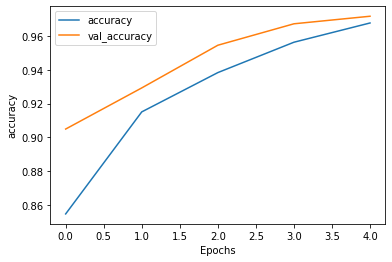

In [ ]:
plot_graph(history,"accuracy")

In [ ]:
def pad_to_size(vec,size):
  zeros = [0] *(size - len(vec))
  vec.extend(zeros)
  return vec

In [ ]:
def predict_fn(pred_text):
  encoded_pred_text = encoder.encode(pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text,32)
  encoded_pred_text = tf.cast(encoded_pred_text,tf.float32)
  predications = model.predict(tf.expand_dims(encoded_pred_text,0))
  return predications

In [ ]:
pred_text = ("This watch is pretty bad. Color and dial looks pathetic")
predication = predict_fn(pred_text)
print(predication)

[[-7.6158867]]


In [ ]:
pred_text = ("Amazing product.Fast Delivery.Nice packing")
predication = predict_fn(pred_text)
print(predication)

[[8.693997]]


In [ ]:
pred_text = ("Color and dial does not look as advertised.Shipping was not better as well")
predication = predict_fn(pred_text)
print(predication)

[[-1.811719]]


In [ ]:
print(tf.distribute.get_strategy())

In [ ]:
%reload_ext tensorboard

In [73]:
%tensorboard --logdir /tmp/logs

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# model.save("/content/drive/MyDrive/Machine_learning/Model/final_sentiment_analysis.hdf5")

# Running saved model using Flask

# Link for download


[Model Link](https://drive.google.com/file/d/1-12XvYeMx_lxqN1B8q_SHWt6PleEvIR-/view?usp=sharing)


[Vocab Link](https://drive.google.com/file/d/18FYYUKVmJ-zyab3oGRb4ElcEvkVVBqIC/view?usp=sharing)



In [49]:
!pip install gdown

##Downloading Model and Vocab on colab

In [50]:
import gdown
model_url = 'https://drive.google.com/u/0/uc?id=1-12XvYeMx_lxqN1B8q_SHWt6PleEvIR-&export=download'
model_file = 'sentiment_model.hd5'
gdown.download(model_url, model_file, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=1-12XvYeMx_lxqN1B8q_SHWt6PleEvIR-&export=download
To: /content/sentiment_model.hd5
119MB [00:00, 199MB/s] 


'sentiment_model.hd5'

In [51]:
vocab_url = "https://drive.google.com/u/0/uc?id=18FYYUKVmJ-zyab3oGRb4ElcEvkVVBqIC&export=download"
vocab_file = 'sa_encoder.vocab'
gdown.download(vocab_url, vocab_file, quiet=False)

Downloading...
From: https://drive.google.com/u/0/uc?id=18FYYUKVmJ-zyab3oGRb4ElcEvkVVBqIC&export=download
To: /content/sa_encoder.vocab
100%|██████████| 579k/579k [00:00<00:00, 50.0MB/s]


'sa_encoder.vocab'

In [52]:
import socket
print(socket.gethostbyname(socket.gethostname()))

172.28.0.2


In [53]:
import tensorflow_datasets as tfds
import tensorflow as tf
from flask import Flask, jsonify, make_response, request
import threading

app = Flask(__name__)
padding_size = 1000
model = tf.keras.models.load_model('/content/sentiment_model.hd5')
text_encoder = tfds.deprecated.text.TokenTextEncoder.load_from_file("/content/sa_encoder.vocab")
print('Model and Vocabalory loaded.......')

@app.route("/")
def hello():
    return "I am alive!"

def pad_to_size(vec, size):
    zeros = [0] * (size - len(vec))
    vec.extend(zeros)
    return vec


def predict_fn(predict_text, pad_size):
    encoded_text = text_encoder.encode(predict_text)
    encoded_text = pad_to_size(encoded_text, pad_size)
    encoded_text = tf.cast(encoded_text, tf.int64)
    predictions = model.predict(tf.expand_dims(encoded_text, 0))

    return (predictions.tolist())


@app.route('/seclassifier', methods=['POST'])
def predict_sentiment():
    text = request.get_json()['text']
    print(text)
    predictions = predict_fn(text, padding_size)
    sentiment = 'positive' if float(''.join(map(str,predictions[0]))) > 0 else 'Negative'
    return jsonify({'predictions ':predictions, 'sentiment ': sentiment})


threading.Thread(target=app.run, kwargs={'host':'0.0.0.0','port':6000}).start()

Model and Vocabalory loaded.......
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production


In [54]:
import requests
req = requests.get("http://172.28.0.2:6000/")
print(req.status_code)
print(req.text)

INFO:werkzeug:172.28.0.2 - - [17/Jun/2021 10:07:20] "GET / HTTP/1.1" 200 -


200
I am alive!


# One with Positive Sentiment Analysis


In [55]:
import requests, json
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
data = {"text":"Still working my way through it but definitely changes your view on investment. Wish it was available on Audible"}
req = requests.post("http://172.28.0.2:6000/seclassifier",  data=json.dumps(data), headers=headers)

print(req.status_code)
print(req.text)

Still working my way through it but definitely changes your view on investment. Wish it was available on Audible


INFO:werkzeug:172.28.0.2 - - [17/Jun/2021 10:07:45] "POST /seclassifier HTTP/1.1" 200 -


200
{"predictions ":[[3.0857815742492676]],"sentiment ":"positive"}

